Simulating the heat equation in Python
===========================================================
In this tutorial we will demonstrate how to simulate partial differential equations (PDEs) using a [finite difference method (FDM)](https://en.wikipedia.org/wiki/Finite_difference_method) in python. 

The general heat equation
-----
The transient heat equation is a PDE which is used to model heat flow and diffusion-type problems common in Chemical Engineering. If the heat thermal conductivity is approximately constant the heat equation can be stated in a general linear form:

$$\frac{\partial u}{ \partial t} = \alpha \nabla^2 u - h \dot{u} + \dot{e}_{gen}$$

* $u$ is the internal energy ($ u = \rho c_p T$) 
* $\alpha \nabla^2 u$ is the conduction term
  * $ \alpha = \frac{\kappa}{\rho c_p }$  is the thermal diffusivity constant where
    * $\kappa$ is thermal conductivity (W/(m·K))
    * $\rho$ is density (kg/m³)
    * $c_{p}$ is specific heat capacity (J/(kg·K))
  * $\nabla^2$ (sometimes written as $\Delta = \nabla \cdot \nabla$) is the [Laplacian operator](http://mathworld.wolfram.com/Laplacian.html)
* $h \dot{u}$ is the convection term
  * $h$ is the convection coefficient
  * $\dot{u}$ is the heat flux density ($\dot{Q} = \dot{u} A_s$ ), 
* $\dot{e}_{gen}$ is the heat generated ($\dot{Q} = \dot{e}_{gen} V$ )

Note that if any of the constant parameters vary with temperature the equation will become non-linear. For example if the thermal conductivity is a strong function of temperature the equation becomes:
$$\frac{\partial u}{ \partial t} = \frac{1}{\rho c_p }\nabla \cdot \left(\kappa(T) \nabla u \right) - h \dot{u} + \dot{e}_{gen}$$

Most systems that you will encounter in Chemical Engineering are non-linear in nature with no analytical solutions. When simplifying assumptions cannot safely be made numerical simulation techniques such as FDM and other more sophisticated methods can be used to solve these problems.

Transient heat conduction in 3 spatial dimensions
---
To demonstrate the FDM technique we will first consider a purely conductive system with no convection and no heat generation (called the diffusion equation (çengel and Ghajar p. 77)):
$$\frac{1}{\alpha}\frac{\partial u}{ \partial t} = \nabla^2 u$$

In the cartesian coordinate system this can be expanded as
$$\frac{1}{\alpha}\frac{\partial u}{ \partial t} = \frac{\partial^2 u }{ \partial x^2 } + \frac{\partial^2 u}{ \partial y^2 } + \frac{\partial^2 u }{ \partial z^2 }$$

When $\rho$ and $c_p$ are constants we can express this equation in terms of temperature variables and after substituting $ u = \rho c_p T$ and deviding throughout:

$$\frac{1}{\alpha}\frac{\partial T}{ \partial t} = \frac{\partial^2 T}{ \partial x^2 } + \frac{\partial^2 T}{ \partial y^2 } + \frac{\partial^2 T }{ \partial z^2 }$$



The finite difference method
---
The FDM relies on approximating the partial differential terms with spatial discretizations. For example the forward difference approximation:

$$\frac{\partial u \left(x , y, z, t\right)}{ \partial x} \approx \frac{u\left(x + \Delta x, y, z, t\right) - u\left(x , y, z, t\right)}{\Delta x} $$

We will be using the central difference approximation for this tutorial, the first and second order central difference approximations are given by

$$\frac{\partial u \left(x , y, z, t\right)}{ \partial x} \approx \frac{u\left(x + \frac{1}{2} \Delta x, y, z, t\right) - u\left(x - \frac{1}{2} \Delta x , y, z, t\right)}{\Delta x}  $$

$$\frac{\partial^2 u  \left(x , y, z, t\right)}{ \partial x^2} \approx \frac{u\left(x + \frac{1}{2}\Delta x, y, z, t\right) -2  u\left(x,y,z,t\right) + u\left(x - \frac{1}{2}\Delta x , y, z, t\right)}{ \Delta x^2}  $$

The finite difference method can be interpreted as a discretization of the continuous real space into a finite set of discreetly defined volumes. For example consider heat transfer in a one dimensional rod of length $L$ along the $x$-axis $x \in [0, L] \subset \mathbb{R} $ into a total of $\textrm{N}$ discrete elements $x = \{x_i ~|~ i \in [0, \textrm{N}) \subset \mathbb{N} \}$ ( or $= \{x_0, x_1, x_2 \dots, x_{\textrm{N} - 1} \}$ )

The following one dimensional heat map illustrates the discretization of a temperature profile for $\textrm{N} = 8$ discrete elements, it is important to note that the independent variables $T_0, T_1, T_2, \dots$ can only have one value defined for each discreet element at a specified time: 

<img src="img/htmap.png">

We will the following notation: the subscripts $i, j, k$ represent the discrete elements for the three spatial coordinates $x, y, z$ respectively at a specific time $t$ written as $u_{i, j, k} (t)$. 
If we choose the first discrete element $i = 0$ to be on the cartesian origin, then each discrete elemenent has the following corresponding position in the continuous domain

$u_{0, j, k} (t) = u(0, y, z, t)$,

$u_{1, j, k} (t) = u(\Delta x, y, z, t)$,

$u_{2, j, k} (t) = u(2  \Delta x, y, z, t)$

$ \vdots $

$u_{N, j, k} (t) = u(N  \Delta x, y, z, t)$. 

The three dimensional conduction equation becomes

$$\frac{1}{\alpha}\frac{\partial u_{i, j, k}}{ \partial t} = \frac{u_{i + 1, j, k} - 2 u_{i,j,k} + u_{i - 1, j, k} }{\Delta x^2} + \frac{u_{i , j + 1, k} - 2 u_{i,j,k} + u_{i, j  - 1, k} }{\Delta y ^2} + \frac{u_{i , j , k+ 1} - 2 u_{i,j,k} + u_{i, j  , k- 1} }{\Delta z^2} $$

the two dimensional conduction equation is written as (suppressing the third suscript)

$$\frac{1}{\alpha}\frac{\partial u_{i, j}}{ \partial t} = \frac{u_{i + 1, j} - 2 u_{i,j} + u_{i - 1, j} }{\Delta x^2} + \frac{u_{i , j + 1} - 2 u_{i,j} + u_{i, j  - 1} }{\Delta y^2} $$

the one dimensional conduction equation is simply

$$\frac{1}{\alpha}\frac{\partial u_{i}}{ \partial t} = \frac{u_{i + 1} - 2 u_{i} + u_{i - 1} }{\Delta x^2} $$

which can be represented in more compact matrix notation
$$
\frac{ \partial U}{\partial t} = A~\vec{U}
$$
where 
$$
A = \frac{1}{\Delta x^2} \left( \begin{array}{cccccccc}-2 & 1 & 0 & 0 & \ldots & 0 & 0 & 0 \\1 & -2 & 1 & 0  & \ldots & 0 & 0 & 0 \\0 & 1 & -2 & 1 & \ldots & 0 & 0 & 0 \\\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\0 & 0 & 0 & 0 & \ldots & 1 & -2 & 1 \\0 & 0 & 0 & 0 & \ldots & 0 & 1 & -2 \end{array} \right)
$$
and
$$
\vec{U}= \left( \begin{array}{c} u_0 \\ u_1 \\ u_2 \\ \vdots \\ u_{N - 1} \\ u_N \end{array} \right)
$$


Returning to the three dimensional case we now have a set of $\textrm{N} \times \textrm{N} \times \textrm{N}$ semi-discrete autonomous ordinary differential equations

$$\frac{\textrm{d}u_{i, j, k}}{\textrm{d} t} = \alpha \left( \frac{u_{i + 1, j, k} - 2 u_{i,j,k} + u_{i - 1, j, k} }{\Delta x^2} + \frac{u_{i , j + 1, k} - 2 u_{i,j,k} + u_{i, j  - 1, k} }{\Delta y ^2} + \frac{u_{i , j , k+ 1} - 2 u_{i,j,k} + u_{i, j  , k- 1} }{\Delta z^2} \right) $$

We can choose to discretize the space as $\Delta x = \Delta y = \Delta z$ producing 

\begin{align}
\frac{\textrm{d}u_{i, j, k}}{\textrm{d} t} =& \alpha \left( \frac{u_{i + 1, j, k} - 2 u_{i,j,k} + u_{i - 1, j, k}  + u_{i , j + 1, k} - 2 u_{i,j,k} + u_{i, j  - 1, k}  + u_{i , j , k+ 1} - 2 u_{i,j,k} + u_{i, j  , k- 1} }{\Delta x^2} \right) \\
=& \alpha \left( \frac{u_{i + 1, j, k} + u_{i - 1, j, k}  + u_{i , j + 1, k} + u_{i, j  - 1, k}  + u_{i , j , k+ 1}  + u_{i, j  , k- 1} - 6 u_{i,j,k} }{\Delta x^2} \right)
\end{align}


We can simulate these equations using another approximation method, we will use a forward difference approximation for time which is identical to the Euler method. Together with the central difference spatial discretization, this method is known as the FTCS (Forward-Time Central-Space) scheme.

$$\frac{\textrm{d} u_{i, j, k} }{\textrm{d} t}  \approx \frac{u_{i, j, k} \left(t + \Delta t \right)  -u_{i, j, k} \left(t \right) }{\Delta t} $$

Finally we obtain the computational set of algebraic equations for all $i, j, k$

$$u_{i, j, k} \left(t + \Delta t \right) = \Delta t \left( \alpha \left( \frac{u_{i + 1, j, k} + u_{i - 1, j, k}  + u_{i , j + 1, k} + u_{i, j  - 1, k}  + u_{i , j , k+ 1}  + u_{i, j  , k- 1} - 6 u_{i,j,k} }{\Delta x^2} \right) \right) - u_{i, j, k} \left(t \right)$$

The FTCS is known to converge iff $\alpha \Delta t \leq \frac{1}{2} \Delta x^2$.




## Example 1: Heat conduction in a 1-dimensional rod


Consider a nuclear control rod made from pure silver measures a total length of $1~\textrm{m}$. The rod was used to control the fission rate inside the reactor and has an initial temperature profile of $u(x, 0) = 298 + 1000x$. The reactor is purged using cold light water with a uniform tempertature of 298 K. The control rod has a fixed temperature of 298 K at $x = 0$ while only the boundary at $x = 1$ is directly exposed to the cold water reservoir with a convection coefficient of $h = 1500 ~\textrm{W}\textrm{m}^{-2}\textrm{K}^{-1}$. It is desired to know how the temperature profile of the control rod changes over time. As a first approximation we will assume that convection and radiation heat transfer everywhere except on the boundaries is neglible and that heat transfer in the axial direction is approximately uniform. Silver has a thermal diffusivity of [$1.6563 \times 10^{-4} \textrm{m}^2 \textrm{s}^{-1}$](https://en.wikipedia.org/wiki/Thermal_diffusivity). Simulate for 60 minutes.



### Solution:
Before solving partial differential equations we state it in standard form as an initial-boundary-value problem (IBVP):

###### PDE:

$$ \frac{\partial u}{ \partial t} = \alpha \frac{\partial^2 u}{\partial x^2} ,~~~~~~~ \begin{array}{lr} x \in [0, 1] \\ t \in [0, \infty)  \end{array} $$

###### Boundary conditions (BCs):
$$
   \left. \begin{array}{lr}
        u(0, t) = 298 \\
        -\frac{\partial u(1, t)}{\partial x}  = h \left( u(1, t) - u_{\infty}\right)
        \end{array}\right\}t \in [0, \infty)
$$

###### Initial conditions (ICs):
$$ u(x, 0) = 298 + 1000x,~~~~~~x \in [0, 1]$$


In this case the PDE is a linear homogeneous equation. We start by implementing the central difference spatial discretization:

$$\frac{\partial u_{i} (t)}{ \partial t} = \alpha \left( \frac{u_{i + 1}(t) - 2 u_{i}(t) + u_{i - 1}(t) }{\Delta x^2} \right)$$

Now use a forward difference approximation for time
$$ u_{i}(t + \Delta t) = \Delta t \alpha \left( \frac{u_{i + 1}(t) - 2 u_{i}(t) + u_{i - 1}(t) }{\Delta x^2} \right) + u_{i}(t)$$

Next we discretize the boundary conditions in space:
\begin{align}
u(0, t) =& 298 \\
u_0 =& 298 
\end{align}

\begin{align}
-\frac{\partial u(1, t)}{\partial x}  =& h \left( u(1, t) - u_{\infty} \right) \\
-\frac{u_N - u_{N - 1}} {\Delta x} =& h \left( u_N - u_{\infty} \right) \\
u_N =& u_{N - 1} - \Delta x h \left( u_N - u_{\infty} \right) \\
u_N =& \frac{ u_{N - 1} + \Delta x h  \left( u_{\infty} \right) } { (1 + \Delta x h)}
\end{align}

Note that the boundary conditions remain constant for all time, so the time discretization simply becomes for all $t$

\begin{align}
u_0(t + \Delta t)  =& 298 \\
u_N(t + \Delta t)  =& \frac{ u_{N - 1} + \Delta x h  \left( u_{\infty} \right) } { (1 + \Delta x h)}
\end{align}

In [138]:
import numpy
# Physical parameters
L = 1  # length m
time = 3600  # s
alpha = 1.6563 * 1e-4  # Thermal diffusivity m2 s-1
h = 1500  # Convection coefficient silver -> water W m-2 K-1
Tw = 298  # Temperature of water reservoir inside reactor at x = L

# Discretization parameters
# Space
N = 30  # Number of discrete spatial elements
x = numpy.linspace(0, L, N + 1)  # A vector of discrete points in space
dx = x[1] - x[0]

# Time
dt = 1/(2 * alpha) * dx**2
Nt = int(time/dt)

tspan = numpy.linspace(0, time, Nt + 1)  # mesh points in time
dt = tspan[1] - tspan[0]

u = numpy.zeros(N + 1)  # unknown u at new time level

# Initial conditions
def IC(x):
    return 298 + 1000 * x  # 1000#298

u = IC(x)  # Set initial condition u(x,0) = IC(x)

# Boundary conditions
def BC_1(u, t):  # Boundary condition at x = 0 (element u_0)
    return 298

def BC_2(u, t):  # Boundary condition at x = L (element u_N)
    return (u[-2] + dx * h * Tw) / (1 + dx * h)

# Storage containers
u_store = []
t_store = []
t_store.append(tspan[0])
u_store.append(numpy.array(u))

for t in tspan:
    # Compute u at inner discrete points at the current time step
    u[1:-1] = u[1:-1] + (alpha * (u[:-2] - 2 * u[1:-1] +  u[2:]) / (dx) ** 2) * dt
    
    # NOTE: This is the vectorised version of the FTCS,
    # it is equivalent to the following more intuitive for loop over each discrete element:
    # for i in range(1, N):
    #     u[i] = u_old[i] + (alpha * (u_old[i - 1] - 2 * u_old[i] + u_old[i + 1]) / (dx) ** 2) * dt
    # u_old = u
               
        
    # Compute u at the boundary conditions
    u[0] = BC_1(u, t)
    u[N] = BC_2(u, t)  

    # Save values
    t_store.append(t)
    u_store.append(numpy.array(u))

There are several ways in which we can visualize the generated data with time contour maps being the most common. The cell below will run an animation of the temperature profile evolving over time, you can slow the animation down by increasing the interval argument.

<IPython.core.display.Javascript object>


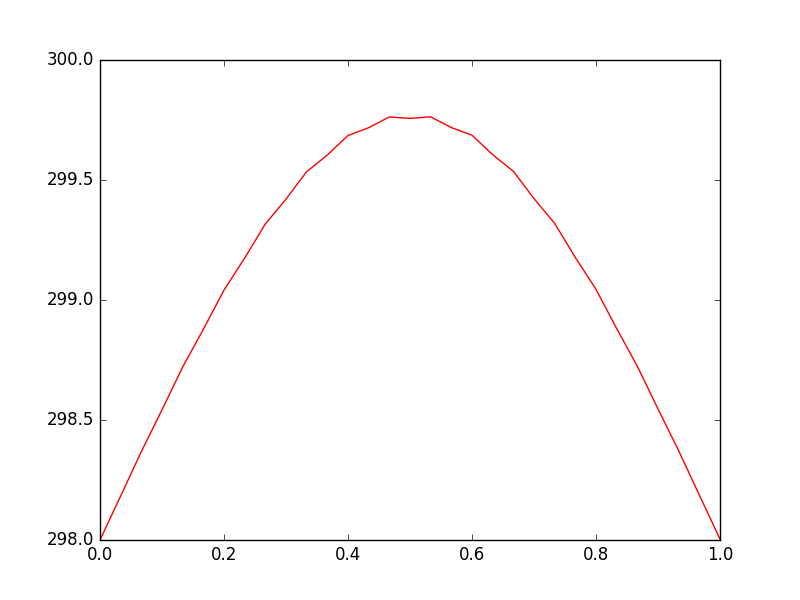

In [139]:
%matplotlib nbagg
import matplotlib.pyplot as plot
import matplotlib.animation as animation

fig = plot.figure(dpi=100)
ax1 = fig.add_subplot(1,1,1)

k = 0
def animate(i):         #The plot shows the temperature evolving with time
    global k            #at each point x in the rod
    try:
        u = u_store[k]            #The ends of the rod are kept at temperature temp0
    except IndexError:
        return
    
    k += 1              #The rod is heated in one spot, then it cools down
    ax1.clear()
    plot.plot(x, u,'r',label='Temperature at x')
    plot.plot(0, 300,'k_',label='Elapsed time {} s'.format(round(t_store[k],2)))
    plot.grid()
    #plt.xlim([0,L])
    plot.xlabel('x')
    plot.ylabel('T / K')
    plot.title('Heat equation')
    plot.legend(fontsize=12)
    return

anim = animation.FuncAnimation(fig, animate,frames=360, interval=1)
plot.show()

<IPython.core.display.Javascript object>


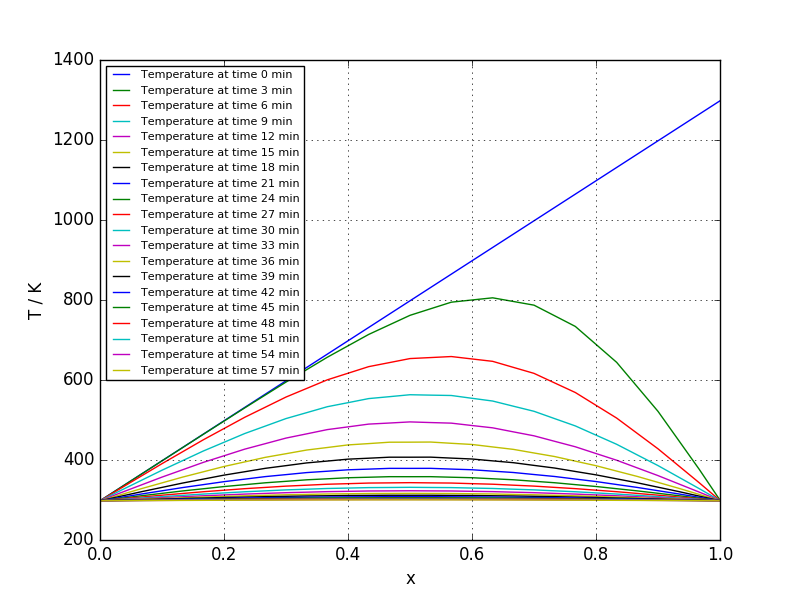

In [4]:
# Contour plots
import matplotlib.pyplot as plot

NL = 20  # Number of countour lines to plot

fig = plot.figure(dpi=100)

for n in range(NL):    
    t = t_store[-1]/NL * n
    u = u_store[int(numpy.shape(u_store)[0]/NL * n)]
    plot.plot(x, u, label='Temperature at time {} min'.format(int(t/60.0)))
    
plot.grid()
plot.xlabel('x')
plot.ylabel('T / K')
plot.legend(fontsize=8, loc=2)
plot.show()

## Example 2: Heat conduction in a 2-dimensional PFR

 
A plug flow reactor was operating a cold water run when the pumps broke down stopping all flows including the reactor water and steam duties in the heat jacket. The reactor has intial steady state temperature profile $ u(r, z, 0) = 298 + 200 \left( \frac{z}{L}\right)^{0.1} + 50 \sqrt{\frac{r}{R}}~$. It is known that axial symmetry may be assumed $\left(\frac{\partial u}{\partial \Phi} = 0\right)$. The reactor has a length of 6 m and a radius of 0.3 m. On the boundaries heat (but no mass) is exchanged with the water left in the steam jacket as well as through the closed valves to the up and downstream stationary water in the reactor inlet and outlet. The heat jacket steam cools as heat is lost to the environment. The convection resistance between the heat jacket and the reactor is neglible and the boundary has the known space-time dependency $u(R, z, t) = 298 + 250 \sqrt{\frac{z}{L}} e^{-5 \times 10^{-6} t}$. The upstream water is a constant temperature resevoir at 298 K while the downstream water ungergoes cooling of its own and has another space-time dependency $u_{\infty, L}(r, t) = 298  +  \left(200 + 50 \sqrt{\frac{r}{R}} \right) e^{-5 \times 10^{-6} t}$. The convection coefficient at the reactor inlets is approximately 300 $~\textrm{W} \textrm{m}^{-2} \textrm{K}^{-1}$. Water has a thermal diffusivity of [$0.143  \times 10^{-6} \textrm{m}^2 \textrm{s}^{-1}$](https://en.wikipedia.org/wiki/Thermal_diffusivity). As a first estimate the all physical parameters are considered constant.

Simulate for 60 hours of real time.



### Solution:
First we state the conduction equation in two-dimensional cylindrical coordinates, the initial-boundary-value problem (IBVP) is

###### PDE:

$$ \rho c_p \frac{\partial u}{ \partial t} = \frac{1}{r} \frac{\partial }{\partial r} \left( \kappa r \frac{\partial u}{\partial r} \right) +  \frac{1}{r} \frac{\partial }{\partial z} \left( \kappa \frac{\partial u}{\partial z} \right),~~~~~~~ \begin{array}{lr} r \in [0, R] \\ z \in [0, L] \\t \in [0, \infty)  \end{array} $$
Since the heat conduction is considered a constant with temperature we devide by $\kappa$ throughout:
$$ \frac{1}{\alpha} \frac{\partial u}{ \partial t} = \frac{1}{r} \frac{\partial }{\partial r} \left( r \frac{\partial u}{\partial r} \right) +  \frac{1}{r} \frac{\partial }{\partial z} \left( \frac{\partial u}{\partial z} \right),~~~~~~~ \begin{array}{lr} r \in [0, R] \\ z \in [0, L] \\t \in [0, \infty)  \end{array} $$

###### Boundary conditions (BCs):
Symmetry conditions (Neumann boundary condition) and heat jacket:
$$
     \begin{array}{lr}
    -\frac{\partial u(0, L, t)}{\partial x}  = 0 \\
     u(R, z, t) = 298 + 250 \sqrt{\frac{z}{L}} e^{-5 \times 10^{-6} t}\\
    \end{array}~~~~~~~ \left\{ \begin{array}{lr} t \in [0, \infty) \\
                                                 z \in [0, L] \end{array}
                            \right.
$$
Reactor inlets:
$$
     \begin{array}{lr}
    -\frac{\partial u(r, 0, t)}{\partial z}  = h \left( u(r, 0, t) - u_{\infty, 0}(t)\right) \\
    -\frac{\partial u(r, L, t)}{\partial z}  = h \left( u(r, L, t) - u_{\infty, L}(t)\right)
    \end{array} ~~~~~~~\left\{ \begin{array}{lr} t \in [0, \infty, L) \\
                                                  r \in [0, R] \end{array}
                                                  \right.
$$

where
\begin{align}
u_{\infty, 0}(t) =& 298 \\
u_{\infty, L}(r, t) =& 298  +  \left(200 + 50 \sqrt{\frac{r}{R}} \right) e^{-5 \times 10^{-6} t}
\end{align}




###### Initial conditions (ICs):
$$  u(r, z, 0) = 298 + 200 \left( \frac{z}{L}\right)^{0.1} + 50 \sqrt{\frac{r}{R}} ~~~~~~ \left\{ \begin{array}{lr} z \in [0, L] \\
                                                                          r \in [0, R] \end{array}
                                                                          \right.
                                                                          $$

We start with a first order central difference spatial discretization at a disrete element $i, j$

$$
\frac{1}{\alpha} \frac{\partial u}{ \partial t} = 
 \frac{ r_{i + 1/2, j} \left.\frac{\partial u}{\partial r}\right|_{i + 1/2, j} 
 - r_{i - 1/2, j} \left.\frac{\partial u}{\partial r}\right|_{i - 1/2, j} 
 }{r_{i, j} \Delta r}
 + \frac{ \left.\frac{\partial u}{\partial z}\right|_{i, j + 1/2} 
 - \left.\frac{\partial u}{\partial z}\right|_{i, j - 1/2} 
 }{r_{i, j} \Delta z}
$$
where
$$
\left.\frac{\partial u}{\partial r}\right|_{i + 1/2, j} = \frac{u_{i + 1, j} - u_{i, j}}{\Delta r}
$$
$$
\left.\frac{\partial u}{\partial r}\right|_{i - 1/2, j} = \frac{u_{i, j} - u_{i-1, j}}{\Delta r}
$$
$$
\left.\frac{\partial u}{\partial z}\right|_{i, j + 1/2} = \frac{u_{i, j + 1} - u_{i, j}}{\Delta z}
$$
$$
\left.\frac{\partial u}{\partial z}\right|_{i, j - 1/2} = \frac{u_{i, j} - u_{i, j-1}}{\Delta z}
$$


$$
\frac{1}{\alpha} \frac{\partial u}{ \partial t} = 
 \frac{ r_{i + 1/2, j} \left(\frac{u_{i + 1, j} - u_{i, j}}{\Delta r}\right)
 - r_{i - 1/2} \left(\frac{u_{i, j} - u_{i-1, j}}{\Delta r}\right)
 }{r_{i, j} \Delta r}
 + \frac{  \left( \frac{u_{i, j + 1} - u_{i, j}}{\Delta z}\right)
 - \left(\frac{u_{i, j} - u_{i, j-1}}{\Delta z}\right)
 }{r_{i, j} \Delta z}
$$

$$
 \frac{\partial u}{ \partial t} = \alpha \left(
 \frac{ r_{i + 1/2, j} \left(\frac{u_{i + 1, j} - u_{i, j}}{\Delta r}\right)
 - r_{i - 1/2, j} \left(\frac{u_{i, j} - u_{i-1, j}}{\Delta r}\right)
 }{r_{i, j} \Delta r}
 + \frac{u_{i, j + 1} - 2 u_i + u_{i, j - 1} }{r_{i, j} (\Delta z)^2} \right)
$$
Now use a forward difference approximation for time
$$ u_{i}(t + \Delta t) = u_{i}(t) + \Delta t \alpha \left(
 \frac{ r_{i + 1/2, j} \left(\frac{u_{i + 1, j} - u_{i, j}}{\Delta r}\right)
 - r_{i - 1/2, j} \left(\frac{u_{i, j} - u_{i-1, j}}{\Delta r}\right)
 }{r_{i, j} \Delta r}
 + \frac{u_{i, j + 1} - 2 u_i + u_{i, j - 1} }{r_{i, j} (\Delta z)^2} \right)$$
 
 The boundary conditions in discrete form:
 
\begin{align}
u_{0, j}(t + \Delta t) = & u_{1, j}(t) ~~~\forall j\\
u_{N_r, j}(t + \Delta t)  =& 298 + 225 \sqrt{z} e^{-0.05 t}  ~~~\forall j \\
u_{i, 0}(t + \Delta t)  =& \frac{ u_{i, 1} + \Delta z h  \left( u_{\infty, 0}(t) \right) } { (1 + \Delta z h)} ~~~\forall i \\
u_{i, N_l}(t + \Delta t)  =& \frac{ u_{i, N_l- 1} + \Delta z h  \left( u_{\infty, L}(t) \right) } { (1 + \Delta z h)} ~~~\forall i
\end{align}

In [134]:
import numpy
from math import e
# Physical parameters
L = 6  # length m
R = 0.3  # radius m
time = 60*3600  # s
alpha = 0.143 * 1e-6  # Thermal diffusivity m2 s-1
h = 300 # Convection coefficient reactor -> duties W m-2 K-1

# Discretization parameters
# Space
Nz = 60  # Number of discrete spatial elements
z = numpy.linspace(0, L, Nz + 1)  # A vector of discrete points in space
dz = z[1] - z[0]
dz2 = (dz) ** 2

Nr = 20  # Number of discrete radial elements
r = numpy.linspace(0, R, Nr + 1)  # A vector of discrete radial points in space
dr = r[1] - r[0]

zg, rg = numpy.meshgrid(z, r)

# Build a radius array at every discrete element i, j
R_ij = rg.T

# Note that the array R_ij has the same entries R_j for all i,
# for this problem we only need to find the outer product at every
# radius element j, so to avoid calculating the inverse every iteration:
R_j = R_ij[0, :]
R_j_inv = 1.0/R_j[1:]  # Avoid division by zero
R_j_fr = (R_j + 0.5*dr)  # Fraction between elements for CDM

# Time
dt = 1 / (2 * alpha) * dz ** 2 * 0.005
Nt = int(time / dt)
tspan = numpy.linspace(0, time, Nt + 1)  # mesh points in time
dt = tspan[1] - tspan[0]


# Initial conditions
def IC(z, r):
    return 298.0 + (200) * (z / L) ** 0.1 + 50 * (r / R) ** 0.5

U = IC(zg.T, rg.T)  # Set initial condition u(x,0) = IC(z, r)


# Boundary conditions
def BC_1(U, t):  # Neumann BC at d u(z, r=0, t)/dx = 0 for all z, t
    return U[:, 1]

def BC_2(z, t):  # BC at u(z, r=R, t) for all z, t
    return 298 + ((250) * (z / L) ** 0.5) * e ** (-5e-6 * t)

def u_inf_0(t):
    return 298 

def u_inf_L(r, t):
    return 298 + ((200) + 50 * (r / R) ** 0.5) * e ** (-5e-6 * t)

def BC_3(U, r, t):  # BC at u(z=0, r, t) for all r, t
    return (U[1, :] + dz * h * u_inf_0(t)) / (1 + dz * h)

def BC_4(U, r, t):  # BC at u(z=L, r, t) for all r, t
    return (U[-2, :] + dz * h * u_inf_L(r, t)) / (1 + dz * h)


# Storage containers
u_store = []
t_store = []
t_store.append(tspan[0])
u_store.append(numpy.array(U))

# Euler loop
for t in tspan:
    # Compute u at inner discrete points at the current time step
    U[1:-1, 1:-1] = U[1:-1, 1:-1] + ( dt * alpha
     * (R_j_inv[:-1] * ((R_j_fr[1:-1] * (U[1:-1,2:] - U[1:-1,1:-1])/dr)
                     -(R_j_fr[0:-2] * (U[1:-1,1:-1] - U[1:-1,0:-2])/dr)
                       )/(dr)
        + R_j_inv[:-1] * (U[0:-2,1:-1] - 2 * U[1:-1, 1:-1] + U[2:,1:-1]) / dz2
        ))

    # Compute u at the boundary conditions
    U[:, 0] = BC_1(U, t)
    U[:, Nr] = BC_2(z, t)
    U[0, :] = BC_3(U, r, t)
    U[Nz, :] = BC_4(U, r, t)

    # Save values
    t_store.append(t)
    u_store.append(numpy.array(U))


<IPython.core.display.Javascript object>


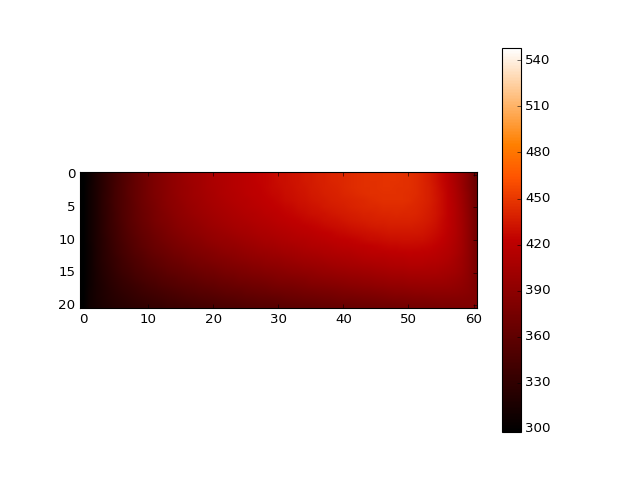

In [135]:
%matplotlib nbagg
import matplotlib.pyplot as plot
import matplotlib.animation as animation

fig2 = plot.figure()
im = plot.imshow(u_store[0].T, cmap=plot.get_cmap('gist_heat'), animated=True)
k = 0

def animate_pfr(i):
    global k 
    try:
        u = u_store[k]
    except IndexError:
        return
    k += 1
    im.set_array(u.T)
    return im,

ani = animation.FuncAnimation(fig2, animate_pfr, frames=len(t_store)-1,
                              interval=1)#, blit=True)
plot.show()
plot.colorbar()

Tutorial questions
===
1. Change the initial conditions of Example 1 to the following temperature profile $u(x, 0) = 298 + 1000 x^2$. Comment on the effect of the initial gradient on the transient process. (5 min)
$~\\ ~$
2. Increase the time discretization $\Delta t$ in Example by a factor of 10. 
  * Comment on the output of the simulation. (5 min)
  * Prove that the series is divergent. (10 min)
$~\\ ~$
  
3. The water used in the PFR in Example 2 is contaminated with radiation producing heat at a constant $\dot{e}_{gen} = 500000~\textrm{W}~\textrm{m}^{-3}$ (constant $\rho c_p$). Add the energy generation term $\frac{\dot{e}_{gen}}{\kappa}$ with $\kappa = 0.6~\textrm{W}~\textrm{m}^{-1}~\textrm{K}^{-1}$ to the PDE in the code (ignore energy generation on the boundaries) and simulate for 60 minutes. (45 min)
*HINT: Consider the total amount of energy generated in a discrete finite volume, in cylindrical cooridates this will vary with $r$. Build a matrix with the volume of each discrete element $i, j$ and use normal matrix algebra to add this term to the heat equation.*
$~\\ ~$

4. In example 2 we assumed a constant conductivity coefficient. Instead use a temperature dependent function. Note that you need to rederive the difference equation since the temperature at a discreet element varies in with the spatial coordinates). The following code snippet demonstrates how to construct a temperature dependent relation for conductivity: (60 min)

In [148]:
try:
    from CoolProp.CoolProp import PropsSI
    # Keep density and heat capacity as constants (SI units)
    cp = PropsSI('conductivity', 'T', 298.15, 'P', 101.325e3, 'water')  
    rho = PropsSI('conductivity', 'T', 298.15, 'P', 101.325e3, 'water')
    
    # Construct a function that returns the conductivity at a specified temperature.
    def k(T):
        return PropsSI('conductivity', 'T', T, 'P', 101.325e3, 'water')

except ImportError:
    print('Run "pip install CoolProp" if not installed '
          'or alternatively find another relation from '
          'which to construct a temperature dependent '
          'conductivity function.')

k(298)

0.6062704412584593

_5. For the PFR in Example 2 rather than using the given temperature profile model the steam inside the heat jacket, model water with a one dimensional heat equation along the length of the PFR, include the convection term (heat loss to the environment at a temperature of $T_{\infty, e} = 298$) with $h=300$ in your one dimensional PDE model (*NOTE: You now have two pde systems defined on their own matrices, but you need to simulate it inside the same Euler loop to allow for heat transfer between the two systems*). Use temperature profile at t=0 as your initial conditions and assume the water is insulated at the boundaries $z =0$ and $z=L~$ (60 min)

